In [1]:
import numpy as np
import cv2 as cv
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

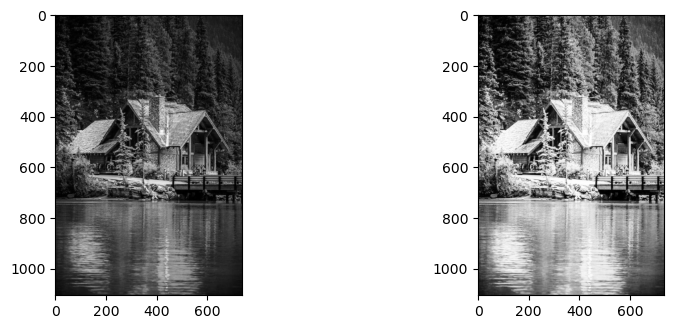

In [2]:
# Загрузка изображения
image = cv2.imread("E:\\TestPhoto.jpg", cv2.IMREAD_GRAYSCALE)
# Вычисление гистограммы изображения
hist = np.zeros(256, dtype=int)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        intensity = image[i, j]
        hist[intensity] += 1

# Вычисление кумулятивной гистограммы
cumulative_hist = np.zeros(256, dtype=int)
cumulative_hist[0] = hist[0]
for i in range(1, 256):
    cumulative_hist[i] = cumulative_hist[i - 1] + hist[i]

# Нахождение минимального ненулевого значения в кумулятивной гистограмме
min_cumulative_hist = min(cumulative_hist[cumulative_hist > 0])

# Преобразование значений интенсивности
M, N = image.shape
equalized_image = np.zeros((M, N), dtype=np.uint8)
for i in range(M):
    for j in range(N):
        intensity = image[i, j]
        equalized_intensity = ((cumulative_hist[intensity] - min_cumulative_hist) / (M * N - min_cumulative_hist)) * 255
        equalized_image[i, j] = equalized_intensity

# Сохранение результата
# cv2.imwrite('equalized_image.jpg', equalized_image)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(image,cmap="gray")
plt.subplot(gs[1])
plt.imshow(equalized_image,cmap="gray")
plt.show()

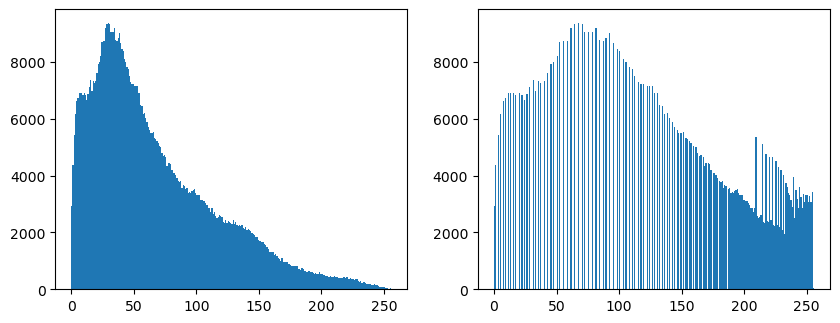

In [13]:
channels = [0]
histSize = [256]
range = [0, 256]

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.hist(image.reshape(-1), 256, range)
plt.subplot(gs[1])
plt.hist(equalized_image.reshape(-1), 256, range)
plt.show()